# Predicting Employees Productivity Using Tree Models

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts. Check out the dataset page [here](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees).

The project aims to use the dataset to predict employee productivity utilizing a tree model.

In [1]:
# loading the dataset

import pandas as pd
import numpy as np

df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Data Exploration
As with any other dataset, determining what each column is telling us is a fundamental part of the exploration. The following are the dataset's official column information:

+ `date`: date in MM-DD-YYYY
+ `quarter`: a portion of the month — month was divided into four quarters
+ `department`: associated department with the instance
+ `day`: day of the week
+ `team`: associated team number with the instance
+ `targeted_productivity`: targeted productivity set by the authority for each team for each day
+ `smv`: standard minute value — the allocated time for a task
+ `wip`: work in progress — includes the number of unfinished items for products
+ `over_time`: represents the amount of overtime by each team in minutes
+ `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
+ `idle_time`: the duration of time when the production was interrupted due to several reasons
+ `idle_men`: the number of workers who were idle due to production interruption
+ `no_of_style_change`: number of changes in the style of a particular product
+ `no_of_workers`: number of workers on each team
+ `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

In [2]:
# shape of the dataset

df.shape

(1197, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
df.describe(include = "object")

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [6]:
df.dtypes.value_counts()

float64    6
int64      5
object     4
dtype: int64

There are 11 numerical features and 4 categorical features.
Let's check each features out.

### **`day`** column

In [7]:
df["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

There are no Friday observations. This doesn't necessarily mean that we have missing information; for instance, it could simply mean that the factory is closed on Fridays.

But definitely it's excellent that we're now aware of this fact, and we can always write down these kind of discoveries to always keep them in mind for future steps.

### **`department`** column

In [8]:
df["department"].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [9]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

### **`quarter`** column

In [10]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

### **`date`** column

In [11]:
df["date"]

0        1/1/2015
1        1/1/2015
2        1/1/2015
3        1/1/2015
4        1/1/2015
          ...    
1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, Length: 1197, dtype: object

The observations started at january one and ended in march 11.

### **`team`** column

In [12]:
df["team"].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

### **`targeted_productivity`** & **`actual_productivity`** columns

A good approach in this case could be to check these two columns together.

For instance, let's check the observations where the productivity was higher than expected.

In [13]:
df[df["actual_productivity"] > df["targeted_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


We can see that in ~75% of all observations, workers were productive and managed to surpass the target productivity threshold.

And now, what about the observations where the actual productivity was exactly equal to the target productivity?

In [14]:
df[df["targeted_productivity"] == df["actual_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


Only six observations. As expected, they were going to be very few, as it's hard to find an exact match between the targeted productivity values and the actual ones.

And finally, we should check the observations where the actual productivity failed to meet the target.

In [15]:
df[df["targeted_productivity"] > df["actual_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Although far fewer than the number of productive days, there are still a lot of observations where productivity targets weren't met. Around ~28% of the total number of observations, actually.

And now, we should focus exclusively on the "actual_productivity" column to check all the observations where the range was higher than 1, despite the description indicating that 1 was the maximum possible value.

In [16]:
df[df["actual_productivity"] > 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


About `3%` of the observation is higher than the actual productivity level

### **`wip`** column
This column records the number of unfinished items for products.

It's also the only column with missing observations.

In [17]:
df["wip"].isna().sum()

506

About 43% observations are empty in `wip` column

### **`over_time`** column

This column records the amount of overtime by each team in minutes. It has a wide range of values, as we already confirmed with the `.describe()` method.

In [18]:
df["over_time"].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

Considering these results, it might be interesting to check the observations where the overtime surpasses a certain threshold. using the value of the 50% percentile:

In [19]:
df[df["over_time"] > 3960]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


As expected, almost half of the observations in the dataset feature a significant overtime among teams.

Let's explore the columns without overtime.

In [20]:
df[df["over_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [21]:
len(df[df["over_time"] == 0])

31

We have only 31 total observations without overtime!

What happens if we contrast the "over_time" column with the ones related to productivity. For instance, how many observations we have where the productivity standards were met without overtime?

In [22]:
df[(df["over_time"] == 0) & (df["actual_productivity"] > df["targeted_productivity"])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


It's clear now that it's a rare event to meet targets without putting in overtime!

### **`incentive`** column
This column is about the financial incentives that motivate a particular course of action. The information we got by using the describe() method was the following:

In [23]:
df["incentive"].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

We can see that workers barely have incentives. How many observations don't feature any kind of incentive?

In [24]:
len(df[df["incentive"] == 0])

604

That's more than half of the entire dataset!

And since incentives only appear for the 75% percentile (which isn't the same to say that they appear exactly on this percentile, by the way), let's see how many observations include incentives greater than 50:

In [25]:
df[df["incentive"] > 50]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
27,1/3/2015,Quarter1,sweing,Saturday,12,0.80,26.16,844.0,7080,63,0.0,0,0,59.0,0.800319
32,1/3/2015,Quarter1,sweing,Saturday,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.787300
45,1/4/2015,Quarter1,sweing,Sunday,9,0.80,26.16,1278.0,7080,60,0.0,0,0,59.0,0.850569
46,1/4/2015,Quarter1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3/10/2015,Quarter2,sweing,Tuesday,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0.850084
1158,3/10/2015,Quarter2,sweing,Tuesday,12,0.80,15.26,1069.0,4080,63,0.0,0,0,34.0,0.800402
1159,3/10/2015,Quarter2,sweing,Tuesday,3,0.80,30.10,756.0,6960,63,0.0,0,1,58.0,0.800072
1178,3/11/2015,Quarter2,sweing,Wednesday,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402


The number is pretty small, only a third with respect to the number of observations without incentives. What happens if we only include observations with an incentive higher than 100?

In [26]:
len(df[df["incentive"] > 100])

34

We only have 34 observations that meet this criteria.

### **`idle_time` & `idle_men` column**

It would be nice to check all the observations where there were interruptions in the production process.

In [27]:
len(df[(df["idle_time"] > 0)])

18

We can see that the factory rarely suffers from interruptions, with only 18 observations where something like this happened.

In [28]:
len(df[(df["idle_men"] > 0)])

18

In [29]:
df[(df["idle_time"] > 0) & (df["idle_men"] == 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


Both columns match, so we don't have anything to worry about here. We can confirm that by re-checking the above table.

### **`no_of_style_change` column**

In [30]:
df["no_of_style_change"].describe()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

We have another pretty uniform column here. Since the number of changes in the style of a particular product was pretty much 0 in most cases, it would be nice to have an idea of how many observations did feature these changes:

In [31]:
df["no_of_style_change"].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

### **`no_of_workers` column**

In [32]:
df["no_of_workers"].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

## **Data Cleaning I**
After properly exploring all the columns, we're now finally able to start cleaning and preparing the data for our Decision Tree model!

Let's start with the "department" column where we found a trailing space that generated two different "finishing" values.

In [33]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

With the following code, we'll select the observations where "finishing" has a trailing space at the end, and then we'll remove it by replacing it with the correctly formatted word.

Therefore, the values will be merged and now we will also get the correct value counts.

In [34]:
# cleaning the department column

df["department"] = df["department"].replace({"finishing ": "finishing"})
df["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

Regarding the `date` column, while it provides useful information (that observations take place in a three month period, from January 1, 2015 to March 11, 2015), it would've been better if the column included observations for the twelve months in a year. In this way it would have potentially offered more predictive power; for instance, by detecting seasonal tendencies (i.e. by revealing that workers tend to decrease productivity during winter).

In [35]:
# dropping the date column

df = df.drop("date", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500


For `quarter` column, it's unnecessary to feature the words "quarter" for every value, when we can simply use integers.

In [36]:
# cleaning the quarter column

mapping = {"Quarter1" : 1, "Quarter2": 2, "Quarter3": 3, "Quarter4": 4, "Quarter5": 5}
df["quarter"] = df["quarter"].replace(mapping)

df["quarter"].value_counts()

1    360
2    335
4    248
3    210
5     44
Name: quarter, dtype: int64

We will get rid of the `idle_time` & `idle_men` columns, as there are only 18 observations with non-zero values. Therefore they are pretty uniform columns and they barely add any information.

In [37]:
df = df.drop(["idle_time", "idle_men"], axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0,8.0,0.886500


We will also delete the `wip` column. It has too many empty observations, and we can't tell if an empty cell is equal to zero unfinished products or if it's simply missing information. Due to this uncertainty, the column should be removed.

In [38]:
df = df.drop("wip", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,0,8.0,0.886500


Finally, we will remove the "no_of_style_change" column, due to only 147 observations where there are changes. Also, they were only one or two style changes.

In [39]:
df = df.drop("no_of_style_change", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500


After finishing with all the column deletions, let's focus on the `no_of_workers` column, which features floats instead of integers. We should fix this because we can't have 1.25 workers; it's either 1 or 2.

In [40]:
df["no_of_workers"] = df["no_of_workers"].astype("int")
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500


Also, `actual_productivity` should feature two decimals, just like `targeted_productivity`.

In [41]:
df["actual_productivity"] = df["actual_productivity"].round(2)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


The following step is crucial: since we are building a Classification Tree and not a Regression Tree, our target column `actual_productivity` must be categorical, not numerical.

To accomplish this, we will create a new column called "productive". It will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset.

In [42]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]

df.sample(5, random_state = 14)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
959,4,finishing,Thursday,10,0.70,2.90,3360,0,8,0.41,False
464,4,finishing,Tuesday,8,0.65,3.94,960,0,8,0.85,True
672,2,sweing,Sunday,7,0.70,24.26,6960,0,58,0.36,False
321,3,sweing,Monday,6,0.80,11.41,4380,50,31,0.80,True
282,3,finishing,Saturday,9,0.80,3.94,1800,0,10,0.83,True


We have removed a number of columns by this point. Let's see which ones still remain.

In [43]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

To finish with this part of the data cleaning process, we will reorder the columns to make the dataset easier to read.

In [44]:
df = df[["quarter", "day", "department", "team", "no_of_workers", "targeted_productivity", 
        "actual_productivity", "productive", "over_time", "smv", "incentive"]]
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,finishing,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,sweing,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,sweing,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,sweing,6,56,0.80,0.80,True,1920,25.90,50


## Dataset Cleaning (II)

The dataset is almost ready to start building the tree, but since `scikit-learn` only works with numerical data, we need to convert some columns from categorical to numerical to use them in our model.

We will now apply categorical encoding to the `department` column, which includes binary values. We'll transform them into booleans and also changing the column name for readability:

In [45]:
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)

df.rename(columns = {"department": "dept_sweing"}, inplace = True) # changing column's name
df.head()

,quarter,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,1,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,0,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,1,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,1,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,1,6,56,0.80,0.80,True,1920,25.90,50


The `department` column is now called `dept_sweing` and its values have to be interpreted in boolean terms: if it's 1 (or "True"), it means the observation belongs to the `sweing department`; if it's 0 ("False"), then it belongs to the `finishing department`.

For the categorical columns which are `quarter`,`day` and `team` columns. we will be using the `sklearn` preprocessing tools `make_column_transformer` with `OneHotEncoder`. Using this instead od pandas dummies saves time and enhance readabreadability.

The following code creates the dummies and also removes the original categorical column. The preprocessing tools return an `object` datatypes. The datatypes will be change to `integers` to work in our model.

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

col_trans = make_column_transformer((OneHotEncoder(), ["quarter","day", "team"]),remainder = "passthrough", verbose_feature_names_out = False)                 
onehot_df = col_trans.fit_transform(df)
df = pd.DataFrame(onehot_df, columns = col_trans.get_feature_names_out())

df = df.astype(int) # changed all the datatypes to integers

df.head(10)

,quarter_1,quarter_2,quarter_3,quarter_4,quarter_5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,...,team_11,team_12,dept_sweing,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,59,0,0,1,7080,26,98
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,8,0,0,1,960,3,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,1,30,0,0,1,3660,11,50
3,1,0,0,0,0,0,0,0,1,0,...,0,1,1,30,0,0,1,3660,11,50
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,56,0,0,1,1920,25,50
5,1,0,0,0,0,0,0,0,1,0,...,0,0,1,56,0,0,1,6720,25,38
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,8,0,0,1,960,3,0
7,1,0,0,0,0,0,0,0,1,0,...,0,0,1,57,0,0,1,6900,28,45
8,1,0,0,0,0,0,0,0,1,0,...,0,0,1,55,0,0,1,6000,19,34
9,1,0,0,0,0,0,0,0,1,0,...,0,0,1,57,0,0,1,6900,28,45


In [47]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   quarter_1              1197 non-null   int64
 1   quarter_2              1197 non-null   int64
 2   quarter_3              1197 non-null   int64
 3   quarter_4              1197 non-null   int64
 4   quarter_5              1197 non-null   int64
 5   day_Monday             1197 non-null   int64
 6   day_Saturday           1197 non-null   int64
 7   day_Sunday             1197 non-null   int64
 8   day_Thursday           1197 non-null   int64
 9   day_Tuesday            1197 non-null   int64
 10  day_Wednesday          1197 non-null   int64
 11  team_1                 1197 non-null   int64
 12  team_2                 1197 non-null   int64
 13  team_3                 1197 non-null   int64
 14  team_4                 1197 non-null   int64
 15  team_5                 1197 non-null  

## Building the Tree
Now that the data was properly adapted for use in scikit-learn, we're ready to start building our decision tree.

In [48]:
X = df.drop(["actual_productivity", "productive"], axis = 1) # feature columns
y = df["productive"] # target column

For the X variable, we removed the column `actual_productivity`, because it would've been the target column for a Regression Tree. As for `productive`, it's the target column we will use here, so we took it out from `X` and it became `y`.

In [49]:
from sklearn.model_selection import train_test_split

# Dividing in training and test sets with train_test_split
# 80% for training sets and 20% for test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Instantiating and fitting the Decision Tree Classifier

class_tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

To ensure that the visualization of our Tree is legible and to avoid overfitting, we set a `max_depth` of 3 so that the Tree only has 3 levels.

Now we will make the predictions on the test set. They will be stored in a variable that we will then use to determine the algorithm's accuracy.

In [51]:
y_pred = class_tree.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.85


## Visualizing and Evaluating the Tree
We will use `plot_tree` to generate this visualization.

In [53]:
class_tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([0, 1])

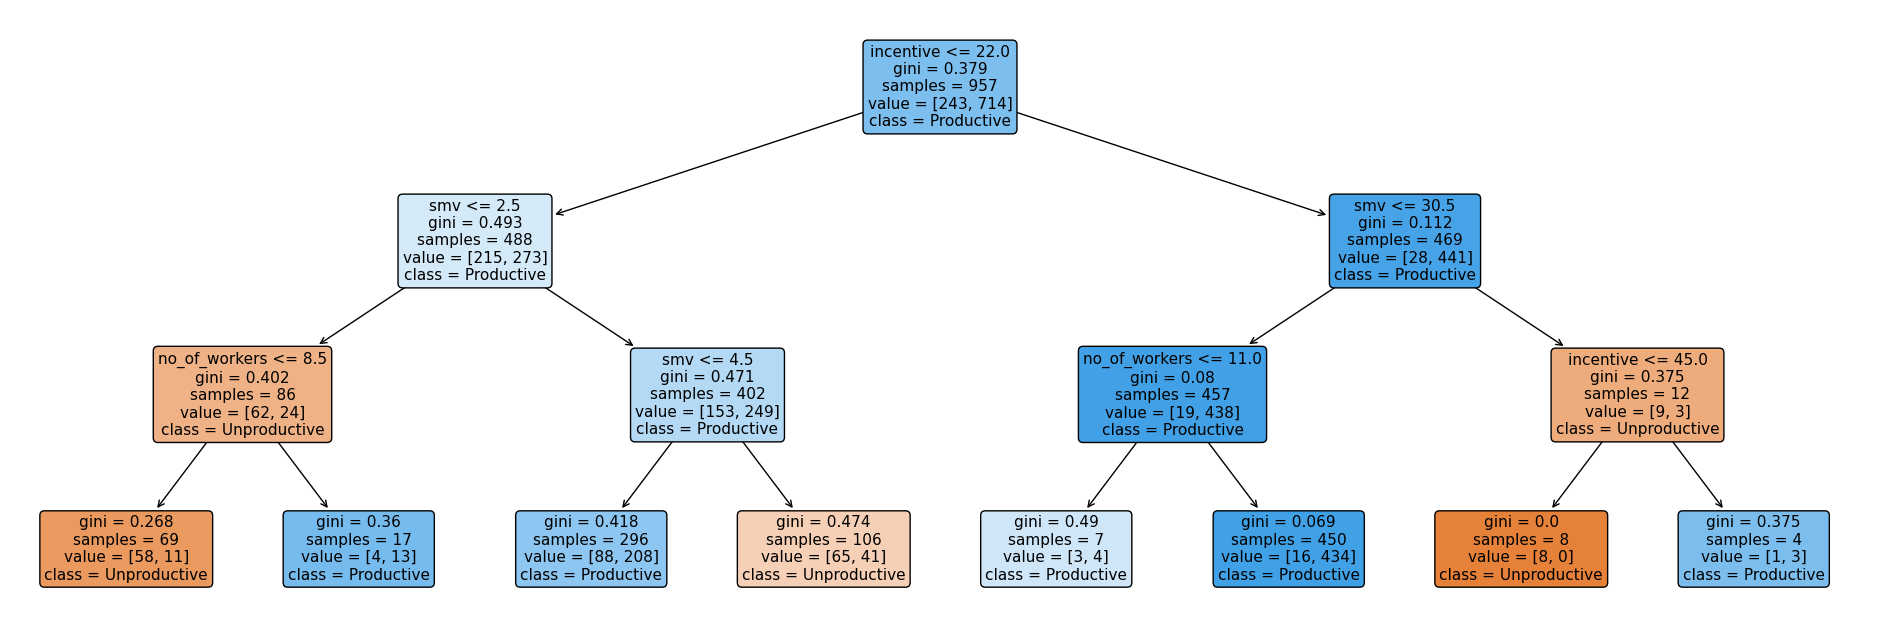

In [54]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize = [24.0, 8.0]) # Setting the size of displayed Tree

_ = plot_tree(class_tree, feature_names = X.columns, class_names = ["Unproductive", "Productive"],
    filled = True, proportion = False, precision = 3, rounded = True, fontsize = 11)
plt.show()

We can see here that the most significant columns turned out to be `incentive` and `smv` (Standard Minute Value, or the allocated time for a task). All the splits, except one, used these columns to progressively divide the dataset into more homogeneous subsets.

It's important to remember that we pruned the tree when we instantiated the model. We restricted it to only feature a maximum depth of **three** levels to avoiding overfitting. If we hadn't, it's likely we would've seen other columns further dividing the dataset.

Let's use the model on a hypothetical observation which has an `incentive` of **24** and a `smv` of **5**. You don't actually need any code to do this, as you can use the tree visually by following the branches to reach the leaf containing the prediction.

Since the `incentive` is greater than 22, 24 <= 22 evaluates to False at the root node and so we follow the path to the right (False splits always go to the right.) Since the `smv` is less than 31.155, 5 <= 31.155 evaluates to True at the child node below the root and so we follow the path to the left (True splits always go to the left.) In the final split before the leaf, since the `smv` is greater than 3.92, 5 <= 3.92 evaluates to False and so we follow the path to the right where we reach the final leaf node, which happens to feature a `Productive` class.

To summarize, all this means that an observation with those characteristics would be predicted as `Productive` by the Decision Tree.

Having plotted the Tree, we can continue exploring how effective the Tree is when using alternate metrics. Let's first start with a [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), to keep it as reference:

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 34,  25],
       [ 11, 170]])

And now we can proceed to calculate the `Precision`, `Recall` and `F1 Score`.

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

Precision: 0.87
Recall: 0.94
F1 Score: 0.9


All these alternate metrics are even superior to Accuracy! Special mention for Recall, with a superb value of 0.94!

This was the Accuracy, as a reminder:

In [57]:
print("Accuracy:", round(class_tree.score(X_test, y_test), 2))

Accuracy: 0.85


We also have another option to evaluate our tree: [Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). It divides the dataset into blocks/folds (the number of folds is determined by the "cv" parameter). Then it creates that many copies of the dataset where each copy will have a different segment of observations compared to the test set.

The algorithm will then iterate on each copy and will output a list of the accuracy scores for all iterations.

This is a practical way to ensure that we didn't get the original accuracy score by pure chance by comparing it with several other possible results.

To improve readability in the calculations below, we have rounded the values to two decimals.

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(class_tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 
print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.73 0.76 0.84 0.82]
Mean Cross Validation Score: 0.82


To finish with this section, let's now get Cross Validated values for the other evaluation metrics:

In [59]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(class_tree, X, y, cv = 10, scoring= ("precision", "recall", "f1") )

In [60]:
print(multiple_cross_scores["test_precision"].round(2))

print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))

[0.86 0.9  0.83 0.85 0.86 0.87 0.79 0.85 0.84 0.84]
Mean Cross Validated Precision: 0.85


In [61]:
print(multiple_cross_scores["test_recall"].round(2))

print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))

[0.96 0.94 0.94 1.   0.99 0.9  0.88 0.82 0.97 0.93]
Mean Cross Validated Recall: 0.93


In [62]:
print(multiple_cross_scores["test_f1"].round(2))

print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

[0.91 0.92 0.88 0.92 0.92 0.88 0.83 0.83 0.9  0.88]
Mean Cross Validated F1: 0.89


As we can see, after double checking with Cross Validate, we're still getting impressive metrics. This is excellent!

## Explaining the Tree
After confirming that our Tree is good enough, here we will explain to the company's leaders not only the insights that our model can provide, but also how Decision Trees themselves are to be interpreted. Imagine that the following text is being read in a conference room to an audience that has never seen a Decision Tree before.

![](https://s3.amazonaws.com/dq-content/755/presentation.avif)

In [63]:
class_tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([0, 1])

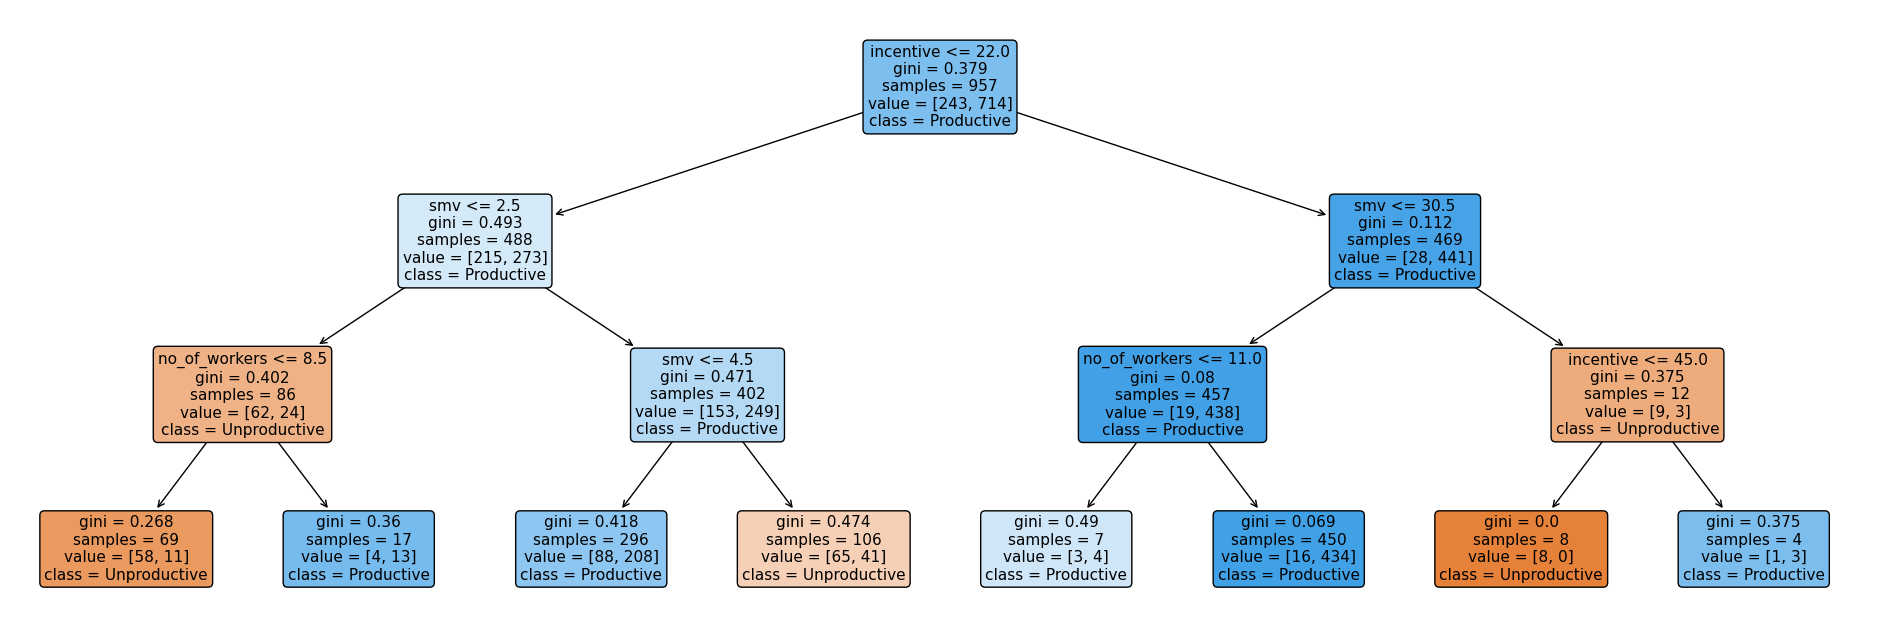

In [64]:
plt.figure(figsize = [24.0, 8.0]) # Setting the size of displayed Tree

_ = plot_tree(class_tree, feature_names = X.columns, class_names = ["Unproductive", "Productive"],
    filled = True, proportion = False, precision = 3, rounded = True, fontsize = 11)
plt.show()

The graphic above was created using predictions produced by the algorithm we implemented — a Decision Tree. We chose this algorithm because, despite how intimidating the graphic appears to be, we'll have you interpreting the results in just a few minutes!

The graphic illustrates which aspects of the factory are best at predicting if a team will be productive or not. When we say aspects, we mean variables like the date, department, team number, etc. In our case, we discovered that the `incentive` and the `smv` variables were the ones with the greatest influence on the final prediction. To provide context, the `incentive` variable represents the amount of financial incentive offered to motivate a particular course of action. The `smv` (Standard Minute Value) variable represents the time allocated for a specific task.

How do we know that these two variables are the most predictive? We know this because of the information included in the square boxes in the graphic! For example, if we focus on the top part of each box, we will see that those two variables are the ones that appear most frequently. In fact, there is only a single exception in the lower left of the graphic where the variable "number of workers" appears at the top.

You may be wondering why the algorithm is called a Decision Tree. Well, you can think of the graphic as an inverted tree with the top box, called the "root", representing the most predictive feature and the boxes at the bottom, called the "leaves", which provide the predictions. These final boxes (leaves) are the ones that tell us whether a team in a specific department was productive or not. The prediction is shown in the "class" component at the bottom of the box. Keep in mind, even though all boxes feature a "class" component, we are only interested in the classes found in a leaf, not before.

**"But how do I know which path to take from the top box to the final ones?" you might ask. Good question! Basically, we need to use the thresholds associated with every variable at the top of every square box. We have to compare our inputs with those thresholds – starting from the root – until we reach the leaves at the bottom**. When we say "input" we are referring to the corresponding `incentives` and `smv` values for a particular team. We can obtain these values from any date we choose in the dataset or we can select the values ourselves to test hypothetical situations. This is excellent for us since it means we can use the Decision Tree to predict the outcome for future and/or hypothetical scenarios so long as we have their respective incentive and SMV values.

**We get it, that last part was a bit overwhelming, so to show you how all this works, let's use an example**: a fictional date where the "incentive" is 22 and "smv" is 4.44 to predict if a team will be productive or not under these conditions. Starting from the root, we see that our first comparison will be 22 <= 22 when **we substitute `incentive` for 22**.

So, is 22 less than or equal to 22? Yes! Since the assertion is True, we follow the arrow to the lower left box. This is a universal rule of Decision Trees: if the assertion is True, we continue to the left; otherwise, if it's False, we continue to the right.

**True = Left. False = Right**.

Now we repeat the process for the rest of the boxes. We apply the same approach to the next box, which has the comparrison 4.44 <= 3.92 after **we substitute `smv` for 4.44**.

So, is 4.44 less than or equal to 3.92? No! Since the assertion is False, we follow the arrow to the lower right box. Again, after substituting "smv" for 4.44 in that box, our final comparison is 4.44 <= 4.865.

So, is 4.44 less than or equal to 4.865? Yes! Since the assertion is True, we follow the arrow to the final lower left box, the leaf, which predicts the team will be "Productive". In other words, if we have a team with an "incentive" of 22 and a SMV of 4.44, it will be a productive team!

To summarize, the Decision Tree not only told us which variables have the strongest predictive power (`incentive` and `smv`), but it also allows us to make predictions using values of our own choosing. This is the power of Decision Trees!

At this point we can ask if anyone have questions?

## Using Random Forest
To confirm and validate the results from our Decision Tree model, let's use a Random Forest to compare results.

In [65]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(oob_score = True, random_state = 24)

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.83


Let's also check the Out of Bag Score. As a reminder, when Random Forest generates training subsets for every individual Tree, it leaves out some observations of the dataset, and if we activate the OOB Score then those observations will be used as test subsets.

In [66]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83


Since the evaluation metrics of our Random Forest are closely similar to the scores of our Decision Tree, we can be confident about our results!

Because of their tendency to overfit the data, it's always considered good practice to double-check Trees with a Random Forest.